In [1]:
import torch
from torch import nn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

`Creating a device agnostic code`
    
-     `meaning our code will get access to gpu if available or cpu by default`

In [87]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

Using Device: cuda


### `Data`

In [88]:
### init weight and bias
weight = 0.7
bias = 0.3

## range values
start = 0
end = 2
step = 0.02

## X and y feature lables
X = torch.arange(start,end,step).unsqueeze(dim=1)  ### without unsqueeze errors will pop up
y = weight * X + bias

In [89]:
len(X),len(y)

(100, 100)

In [90]:
### spliting data into train and test
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [91]:
len(X_train), len(y_train)

(80, 80)

In [92]:
len(X_test), len(y_test)

(20, 20)

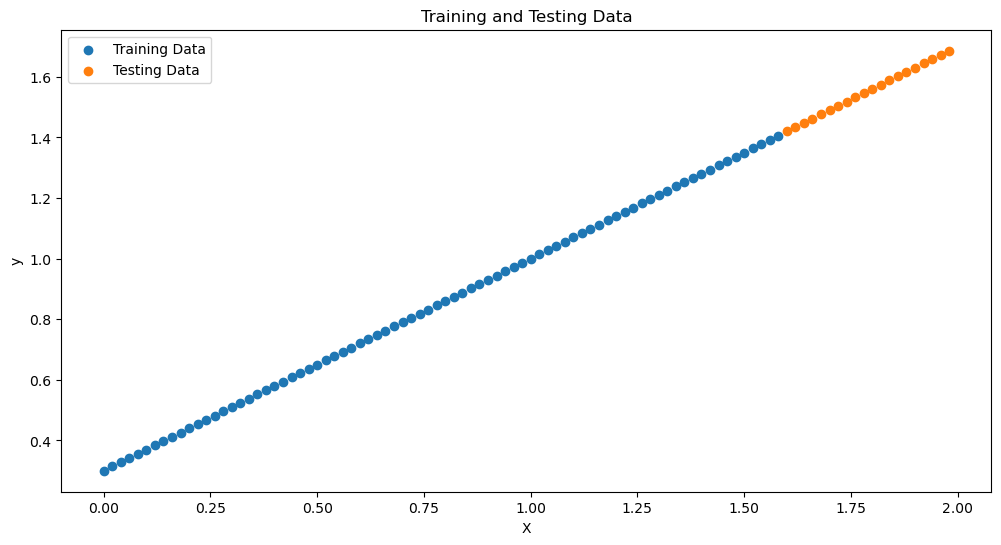

In [93]:
### plot the data
plt.figure(figsize=(12,6))
plt.scatter(X_train,y_train, label="Training Data")
plt.scatter(X_test,y_test, label="Testing Data")
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Testing Data')
plt.show()

### `Building a PyTorch Linear Model`

In [94]:
class LineaRegression(nn.Module):
    def __init__(self):
        super().__init__()
        ### nn.Linear() for creating model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
## set the manual seed
torch.manual_seed(42)
model = LineaRegression()
model, model.state_dict()    

(LineaRegression(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [95]:
### check the model current device
next(model.parameters()).device

device(type='cpu')

In [96]:
# model.to(device)
# next(model.parameters()).device 
### this code is not working

### `Training`

In [97]:
### setup loss function
loss_fn = nn.L1Loss()  ## MAE
## setup optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.01)


In [98]:
### training loop
torch.manual_seed(67)

epochs = 100

# put data to device agnostic code
# X_train = X_train.to(device)
# y_train = y_train.to(device)
# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(epochs):
    model.train()
    
    ## forward pass
    y_pred = model(X_train)
    ## calculate the loss
    loss =loss_fn(y_pred, y_train)
    ## optimizer zero grad
    optimizer.zero_grad()
    ## backprop
    loss.backward()
    ## optimizer step
    optimizer.step()
    ## testing
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 5 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test_Loss: {test_loss}")


Epoch: 0 | Loss: 0.5809932947158813 | Test_Loss: 0.6213908791542053
Epoch: 5 | Loss: 0.499788373708725 | Test_Loss: 0.5006859302520752
Epoch: 10 | Loss: 0.4185834527015686 | Test_Loss: 0.37998098134994507
Epoch: 15 | Loss: 0.33737850189208984 | Test_Loss: 0.25927603244781494
Epoch: 20 | Loss: 0.2561735510826111 | Test_Loss: 0.1385711133480072
Epoch: 25 | Loss: 0.17496861517429352 | Test_Loss: 0.019734840840101242
Epoch: 30 | Loss: 0.10299072414636612 | Test_Loss: 0.08629216253757477
Epoch: 35 | Loss: 0.08484412729740143 | Test_Loss: 0.12231681495904922
Epoch: 40 | Loss: 0.07775498926639557 | Test_Loss: 0.13390929996967316
Epoch: 45 | Loss: 0.0726298838853836 | Test_Loss: 0.13401955366134644
Epoch: 50 | Loss: 0.06794779002666473 | Test_Loss: 0.12994453310966492
Epoch: 55 | Loss: 0.06337634474039078 | Test_Loss: 0.12311546504497528
Epoch: 60 | Loss: 0.05881597846746445 | Test_Loss: 0.11492715030908585
Epoch: 65 | Loss: 0.05427064374089241 | Test_Loss: 0.10605914890766144
Epoch: 70 | Loss

In [99]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6463]])),
             ('linear_layer.bias', tensor([0.3515]))])

In [101]:
### making predictions

with torch.inference_mode():  ## turns off gradient tracking
    y_preds = model(X_test)   ## makes your code faster since it does not track grad func

y_preds

tensor([[1.3855],
        [1.3985],
        [1.4114],
        [1.4243],
        [1.4372],
        [1.4502],
        [1.4631],
        [1.4760],
        [1.4889],
        [1.5019],
        [1.5148],
        [1.5277],
        [1.5406],
        [1.5536],
        [1.5665],
        [1.5794],
        [1.5923],
        [1.6053],
        [1.6182],
        [1.6311]])

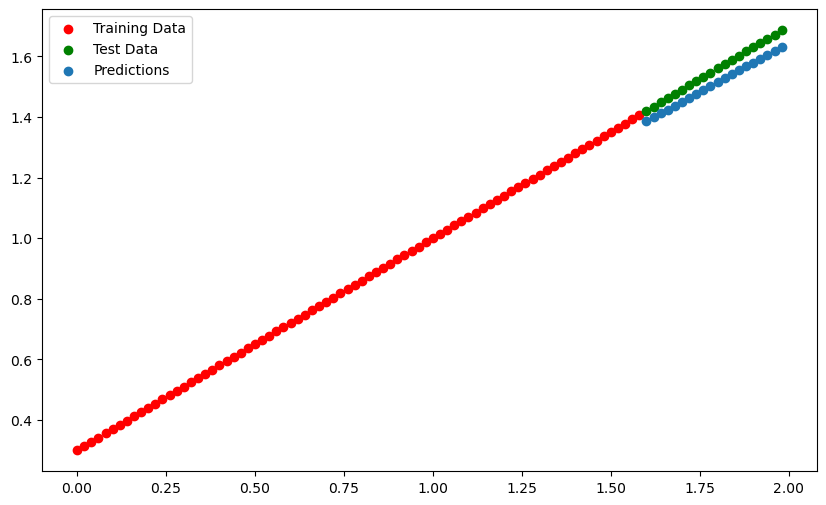

In [103]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,c="r",label="Training Data")
plt.scatter(X_test,y_test,c="g",label="Test Data")
plt.scatter(X_test,y_preds,label="Predictions")
plt.legend()
plt.show()

### `Saving and loading a model`

In [107]:
from pathlib import Path
## create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)
## create model save path
MODEL_NAME = "pytorchLinear.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
### save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\pytorchLinear.pth


In [108]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6463]])),
             ('linear_layer.bias', tensor([0.3515]))])

In [110]:
## loading a pytorch model
## create a new instance of Linear Regression Model

loaded_model = LineaRegression()

## load the saved model
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH,weights_only=True))


<All keys matched successfully>

In [111]:
next(loaded_model.parameters())

Parameter containing:
tensor([[0.6463]], requires_grad=True)

In [112]:
### evaluate loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])